In [256]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore,boxcox

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

#Deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [257]:
df=pd.read_csv('ElectionData.csv')

In [258]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [260]:
df['territoryName'].value_counts()

Território Nacional    1134
Braga                  1134
Leiria                 1134
Porto                  1134
Aveiro                 1080
Viana do Castelo       1080
Viseu                  1080
Lisboa                 1080
Coimbra                1080
Madeira                1080
Setúbal                1080
Évora                  1026
Faro                   1026
Guarda                 1026
Santarém               1026
Bragança                972
Castelo Branco          972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [261]:
le=LabelEncoder()

In [262]:
df['territoryName']=le.fit_transform(df['territoryName'])

In [263]:
df['time']=pd.to_datetime(df['time'])

In [264]:
df['Month']=df['time'].dt.month

In [265]:
df['Year']=df['time'].dt.year

In [266]:
df['Month'].value_counts()

10    21643
Name: Month, dtype: int64

In [267]:
df=df.drop('Month',axis=1)

In [268]:
df['Year'].value_counts()

2019    21643
Name: Year, dtype: int64

In [269]:
df=df.drop('Year',axis=1)

In [270]:
df['DayOfWeek']=df['time'].dt.dayofweek

In [271]:
df['Date']=df['time'].dt.date

In [272]:
df['Date'].value_counts()

2019-10-06    18419
2019-10-07     3224
Name: Date, dtype: int64

In [273]:
df['DayOfWeek'].value_counts()

6    18419
0     3224
Name: DayOfWeek, dtype: int64

In [274]:
df=df.drop('DayOfWeek',axis=1)

In [275]:
df['Date']=le.fit_transform(df['Date'])

In [276]:
df['Hour']=df['time'].dt.hour

In [277]:
df=df.drop('time',axis=1)

In [278]:
df['Party'].value_counts

<bound method IndexOpsMixin.value_counts of 0             PS
1        PPD/PSD
2           B.E.
3         CDS-PP
4        PCP-PEV
          ...   
21638         NC
21639        PNR
21640        MPT
21641        PTP
21642        JPP
Name: Party, Length: 21643, dtype: object>

In [279]:
df['Party'].nunique()

21

In [280]:
df['Party']=le.fit_transform(df['Party'])

In [281]:
df.shape

(21643, 29)

In [282]:
# zs=zscore(df)
# df=df[((zs<3)).all(axis=1)]

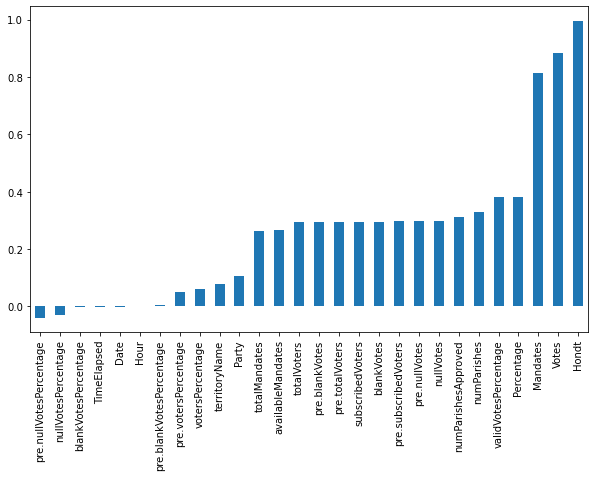

In [283]:
plt.figure(figsize=(10,6))
df.corr()['FinalMandates'].sort_values().drop('FinalMandates').plot(kind='bar')
plt.show()

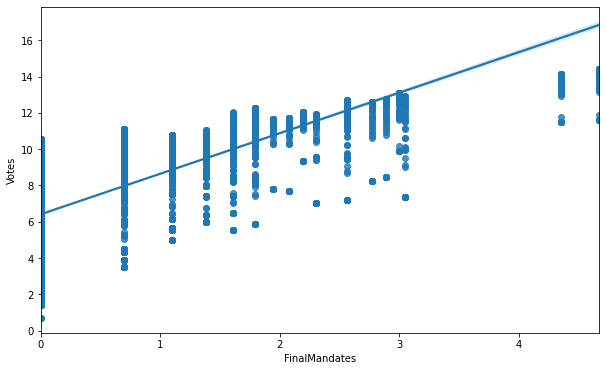

In [321]:
plt.figure(figsize=(10,6))
sns.regplot(x='FinalMandates',y='Votes',data=df)
plt.show()

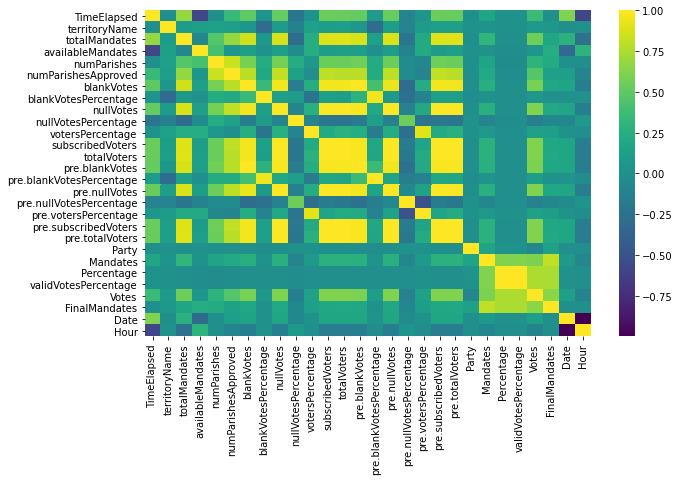

In [324]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=False,cmap='viridis')
plt.show()

In [284]:
#We will drop Hondt column as it is highly correlated and won't let other features get trained
df=df.drop('Hondt',axis=1)

In [285]:
df.skew()

TimeElapsed                 -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
FinalMandates               12.402865
Date        

In [286]:
pt=PowerTransformer()

In [287]:
for x in df.columns:
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=np.log1p(df.loc[:,x].values.reshape(-1,1))

In [288]:
scale=MinMaxScaler()

In [289]:
X=df.drop('FinalMandates',axis=1)
y=df['FinalMandates']

In [290]:
X=scale.fit_transform(X)

In [291]:
df.isna().sum()

TimeElapsed                 0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
FinalMandates               0
Date                        0
Hour                        0
dtype: int64

In [292]:
def model(mod):
    maxscore=0
    maxsstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=mod()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxsstate=x
    print("Max score is {} and maxstate is {}".format(maxscore,maxsstate))

In [293]:
model(LinearRegression)

Max score is 0.8336970776657383 and maxstate is 96


In [294]:
model(RandomForestRegressor)

Max score is 0.9990693366943082 and maxstate is 45


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [298]:
cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()

0.997634587048115

In [299]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [300]:
print("R2 score is {}".format(r2_score(y_test,predict)))
print()
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print()
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

R2 score is 0.9993605547608988

MAE score is 0.0023791981454317503

RMSE score is 0.015732283315496857


In [301]:
joblib.dump(rf,'Election RF.obj')

['Election RF.obj']